1. Make seeping function work with intervals startinf in a  number $\neq 0$ $\checkmark$.
2. Make that function work for $n=0$, combining it with Pul $\checkmark$.
3. Modify then that funciton to act on the pulse list given the condition of Sweep time.  $\checkmark$.
4. Search and correct the bugs. $\checkmark$
5. Implement Sweeping with Duration. $\checkmark$
6. Calculate the number of points given by the sweeping rite and total time  $N=$ sweeping rate $* T$
7. Leave the timestep as a parameter $\checkmark$
8. Returning the time array $\checkmark$
9. Mergin functions $\checkmark$
10. Putting all into class
11. add units V:(mv) , t: (s) $\checkmark$

In [1]:
%matplotlib inline 

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Pulses

Time is given in seconds, Amplitude is Voltage in milivolts.

In [3]:
Rabi={
    'Amplitude':10,
    'Start time':1e-10,
    'End time':2e-10,
    'Start Duration':5,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [4]:
Probe0={
    'Amplitude':2 ,
    'Start time':5,
    'End time':35,
    'Start Duration':3,
    'End Duration':8,
    'Sweep time':0,
    'Sweep Duration':1
}

In [5]:
Probe1={
    'Amplitude':2,
    'Start time':0,
    'End time':20,
    'Start Duration':7,
    'End Duration':9 ,
    'Sweep time':1,
    'Sweep Duration':0
}

In [6]:
Probe2={
    'Amplitude':6,
    'Start time':10,
    'End time':21,
    'Start Duration':4,
    'End Duration':9,
    'Sweep time':1,
    'Sweep Duration':1
}

In [7]:
Probe3={
    'Amplitude':5,
    'Start time':5,
    'End time':10,
    'Start Duration':1,
    'End Duration':5,
    'Sweep time':1,
    'Sweep Duration':0
}

In [8]:
PulsoG={
    'Amplitude':6,
    'Start time':0,
    'End time':9,
    'Start Duration':2,
    'End Duration':6 ,
    'Sweep time':1,
    'Sweep Duration':1
}

In [9]:
PulsoH={
    'Amplitude':6,
    'Start time':4,
    'End time':9,
    'Start Duration':3,
    'End Duration':5,
    'Sweep time':1,
    'Sweep Duration':1
}

## Pulse schemes = Lists of the dictionaries

In [10]:
Pulses_List3 = [
    Rabi, Probe1, Probe2
    ];


Pulses_List = [
    Rabi,Probe1
    ]  ;



Pulses_List2 = [
    Rabi,Probe2
    ];

PScheme=[
    Rabi,Probe0
    ]

## Single Pulse Function

In [11]:
def sweep0(Pulse,N,n,t):
    
    """Sweeping function for a single pulse with respect of time and duration.
    
    This function takes the Amplitude, Start and End time, Start and End and Duration of the Pulse dictionary.
    Given a total number of points N, it calcultes the time step dt and the duration step dτ depending on 
    the values of 'Sweep Duration' and 'Sweep time' keys. 
    It then calculates the pulse shape up to the given n point at a time t.
    
    If both of the sweeping keys are equal to zero, it just gives the puls shape at 'Starting time' with 'Starting Duration' at time t
    """
    
    if 0 <= n <= N:
        
        if Pulse['Sweep time'] == 0:
            dt = 0

        #Sweeping with respect to time
        if Pulse['Sweep time'] == 1:
            dt = (Pulse['End time'] - Pulse['Start time'])/N

        if Pulse['Sweep Duration'] == 0:
            dτ = 0

        #Sweeping with respect to Duration
        if Pulse['Sweep Duration'] == 1:
            dτ = (Pulse['End Duration'] - Pulse['Start Duration'])/N


        new_start = n * dt + Pulse['Start time']
        new_duration = n * dτ + Pulse['Start Duration']
        
        pol = Pulse['Amplitude'] * (new_start <= t <= new_duration + new_start)
        return pol
    
    else:
        print('n must be in the interval',[0,N])

## Pulse Scheme Sweeping Function

In [12]:
def Sweep(PulList,N,n,t,Δt):
    
    """Function that perfoms or not a Sweep, depending on the Sweep dictionary keys, for the Pulse Scheme PulList.
    
    This function is a generalization of the sweep0(Pulse,N,n,t).
    It calls it and maps it over every Pulse in the list of pulses PulList.
    If two pulses overlap, their amplitude is added up.
    Δt gives the number of time steps for the overal pulse scheme, not to be confuced with dt, the sweeping time step given by N
    """
    
    #time interval
    time = np.linspace(-1e-10,t,Δt)
    #Each pulse will be an array, and an entry of a bigger array (we have an array of arrays)
    pularray = np.zeros((len(PulList),len(time)))
    
    for i in range(0,len(PulList)):
        pularray[i] = np.array([sweep0(PulList[i],N,n,x) for x in time])
        
    #the final pulse scheme will be the overlap of each individual pulse, given by the sum of their arrays    
    pulscheme = np.zeros(len(pularray[0]))
    
    for i in range(0,len(pularray)):
        pulscheme += pularray[i]
        
    return pulscheme, time

## Testing

In [13]:
#Pulse List_2

pobos0,trog1 = Sweep(Pulses_List2,100,0,31,1000); #Starting point
pobos50, trog1 = Sweep(Pulses_List2,100,50,31,1000); #Midle Point
pobos100, trog1 = Sweep(Pulses_List2,100,100,31,1000); #End Point

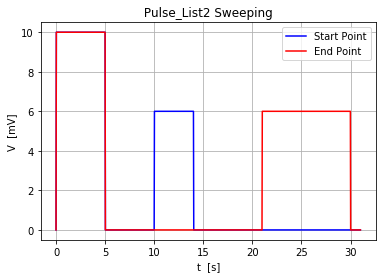

In [17]:

fig,ax= plt.subplots()



ax.grid(True)
plt.plot(trog1,pobos0,'-b',label='Start Point')#blue  = start
#plt.plot(trog1,pobos50,'-g',label='Midle Point') #green = mittel
plt.plot(trog1,pobos100,'-r',label='End Point') #red = end
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
ax.set_title(' Pulse_List2 Sweeping ')
ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [15]:
Pulses_List2

[{'Amplitude': 10,
  'Start time': 1e-10,
  'End time': 2e-10,
  'Start Duration': 5,
  'End Duration': 6,
  'Sweep time': 0,
  'Sweep Duration': 0},
 {'Amplitude': 6,
  'Start time': 10,
  'End time': 21,
  'Start Duration': 4,
  'End Duration': 9,
  'Sweep time': 1,
  'Sweep Duration': 1}]